In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [ ]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from IPython.display import display

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from importlib import reload
reload(plt)

from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

In [3]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [6]:
train = train.drop((missing_data[missing_data['Total'] > 1]).index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max()

0

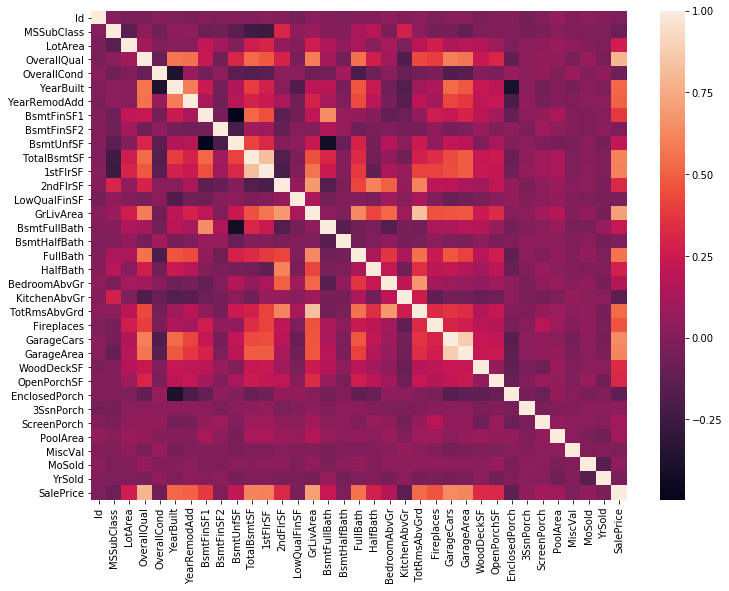

In [7]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat);


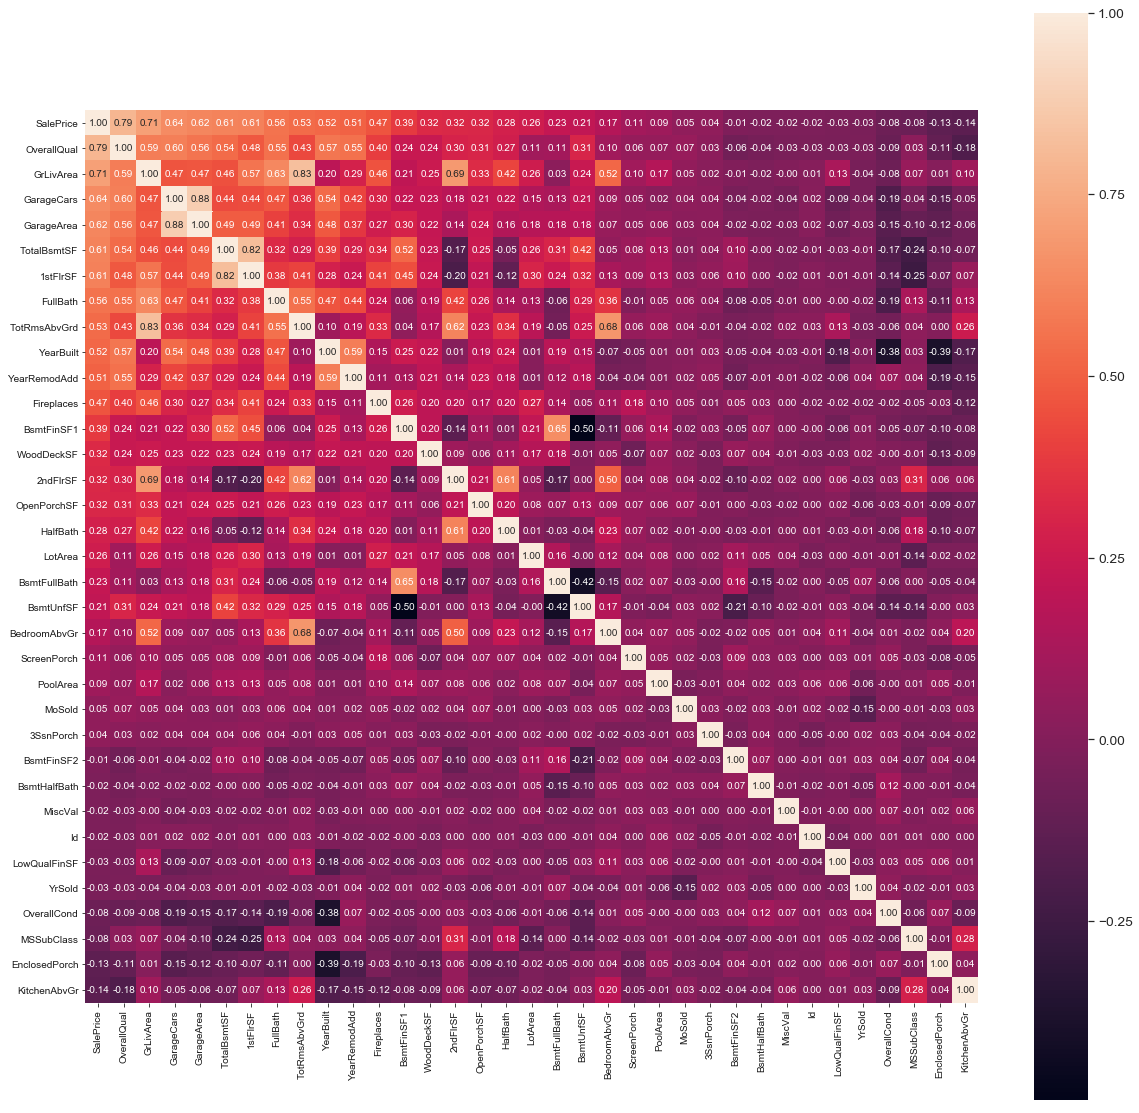

In [8]:
k = 40 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(20, 20))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [9]:
train.shape

(1459, 63)

In [10]:
train.sort_values(by = 'GrLivArea', ascending = False)[:2]
# train = train.drop(train[train['Id'] == 1299].index)
# train = train.drop(train[train['Id'] == 524].index)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [11]:
y_train = train['SalePrice']

In [12]:
x_train  = train[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
x_test  = test[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]

In [13]:
x_test.info(), x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 6 columns):
OverallQual    1459 non-null int64
GrLivArea      1459 non-null int64
GarageCars     1458 non-null float64
TotalBsmtSF    1458 non-null float64
FullBath       1459 non-null int64
YearBuilt      1459 non-null int64
dtypes: float64(2), int64(4)
memory usage: 68.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 6 columns):
OverallQual    1459 non-null int64
GrLivArea      1459 non-null int64
GarageCars     1459 non-null int64
TotalBsmtSF    1459 non-null int64
FullBath       1459 non-null int64
YearBuilt      1459 non-null int64
dtypes: int64(6)
memory usage: 79.8 KB


(None, None)

In [14]:
total1 = x_test.isnull().sum().sort_values(ascending=False)
percent1 = (x_test.isnull().sum()/x_test.isnull().count()).sort_values(ascending=False)
missing_data1 = pd.concat([total1, percent1], axis=1, keys=['Total', 'Percent'])
missing_data1

,Total,Percent
TotalBsmtSF,1,0.000685
GarageCars,1,0.000685
YearBuilt,0,0.000000
FullBath,0,0.000000
GrLivArea,0,0.000000
OverallQual,0,0.000000


In [15]:
x_train = x_train.values
type(x_train)

numpy.ndarray

In [16]:
x_test.fillna(method = 'backfill', inplace = True)
x_test = x_test.values

In [17]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [18]:
x_train.shape, x_test.shape, y_train.shape

((1459, 6), (1459, 6), (1459,))

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [20]:
output = pd.DataFrame({ 'Id' : test['Id'], 'SalePrice': y_pred.flatten() })
output.to_csv('submissions/linear-reg-house-prices-predictions-kaggle.csv', index = False)

In [21]:
import xgboost 

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(x_train,y_train)
predictions = xgb.predict(x_test)

In [22]:
output1 = pd.DataFrame({ 'Id' : test['Id'], 'SalePrice': predictions })
output1.to_csv('submissions/xgboost-house-prices-predictions-kaggle.csv', index = False)

In [23]:
from sklearn.svm import SVR
regressor2 = SVR(kernel = 'rbf')
regressor2.fit(x_train, y_train)
y_pred_svr = regressor2.predict(x_test)

In [24]:
output2 = pd.DataFrame({ 'Id' : test['Id'], 'SalePrice': y_pred_svr })
output2.to_csv('submissions/svr-house-prices-predictions-kaggle.csv', index = False)

In [25]:
from sklearn.ensemble import RandomForestRegressor
regressor3 = RandomForestRegressor(n_estimators=60, n_jobs=-1, 
                                   oob_score=True, max_features = 0.2)
regressor3.fit(x_train, y_train)
y_pred_rf = regressor3.predict(x_test)

In [26]:
output2 = pd.DataFrame({ 'Id' : test['Id'], 'SalePrice': y_pred_rf })
output2.to_csv('submissions/random-forest-house-prices-predictions-kaggle.csv', index = False)